In [1]:
import os
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

# loading training data from keras datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


In [2]:
# functions for data preprocessing
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [3]:
# normalization
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# transform target y to one-hot encoding vector
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
# using the same model as example online with three hidden layers
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
# hyperparameters
LEARNING_RATE = 0.01 # this learning rate shows the best result in example online
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.1,0.3,0.5,0.7,0.95]

In [6]:
results = {}

for m in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Momentum = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updatin

Epoch 48/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.2094 - acc: 0.5760 - val_loss: 1.4023 - val_acc: 0.5078
Epoch 49/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.1990 - acc: 0.5806 - val_loss: 1.6042 - val_acc: 0.4503
Epoch 50/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.1948 - acc: 0.5815 - val_loss: 1.3514 - val_acc: 0.5191
Experiment with Momentum = 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (D

Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.1586 - acc: 0.5930 - val_loss: 1.4789 - val_acc: 0.4854
Epoch 50/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.1513 - acc: 0.5972 - val_loss: 1.3964 - val_acc: 0.5068
Experiment with Momentum = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)           

Epoch 50/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.0348 - acc: 0.6385 - val_loss: 1.4670 - val_acc: 0.4905
Experiment with Momentum = 0.700000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________

Experiment with Momentum = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

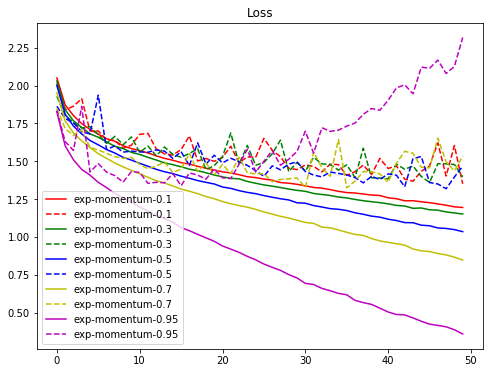

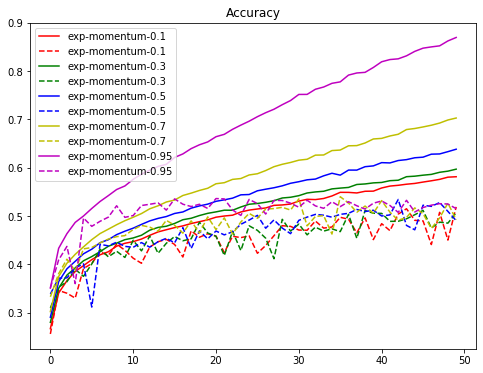

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [8]:
results2 = {}

for m in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (m))
    model2 = build_mlp(input_shape=x_train.shape[1:])
    model2.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=m)
    model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model2.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss2 = model2.history.history["loss"]
    valid_loss2 = model2.history.history["val_loss"]
    train_acc2 = model2.history.history["acc"]
    valid_acc2 = model2.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(m)
    results2[exp_name_tag] = {'train-loss': train_loss2,
                             'valid-loss': valid_loss2,
                             'train-acc': train_acc2,
                             'valid-acc': valid_acc2}

Experiment with Momentum = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.0279 - acc: 0.2723 - val_loss: 1.9675 - val_acc: 0.3061
Epoch 2/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.8370 - acc: 0.3491 - val_loss: 1.7927 - val_acc: 0.3675
Epoch 3/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7670 - acc: 0.3776 - val_loss: 1.8297 - val_acc: 0.3550
Epoch 4/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7172 - acc: 0.3956 - val_loss: 1.7210 - val_acc: 0.3899
Epoch 5/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.6791 - acc: 0.4075 - val_loss: 1.7311 - val_acc: 0.3749
Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6440 - acc: 0.4217 - val_loss: 1.6967 - val_acc: 0.3932
Epoch 7/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6164 - acc: 0.4304 - val_loss: 1.6294 

Epoch 2/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7535 - acc: 0.3787 - val_loss: 1.7171 - val_acc: 0.3911
Epoch 3/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6741 - acc: 0.4074 - val_loss: 1.6724 - val_acc: 0.4101
Epoch 4/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.6211 - acc: 0.4276 - val_loss: 1.5997 - val_acc: 0.4337
Epoch 5/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5736 - acc: 0.4464 - val_loss: 1.5687 - val_acc: 0.4367
Epoch 6/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.5336 - acc: 0.4579 - val_loss: 1.6506 - val_acc: 0.4128
Epoch 7/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.5039 - acc: 0.4686 - val_loss: 1.5884 - val_acc: 0.4493
Epoch 8/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.4725 - acc: 0.4798 - val_loss: 1.4973 - val_acc: 0.4663
Epoch 9/50
50000/50000 [======

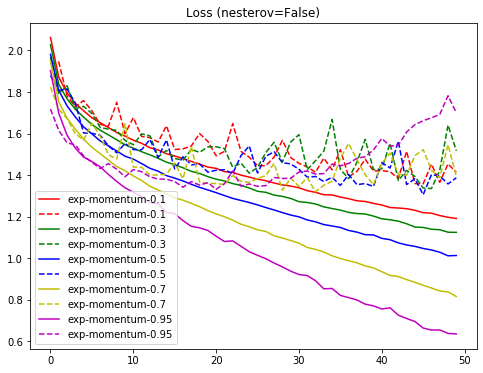

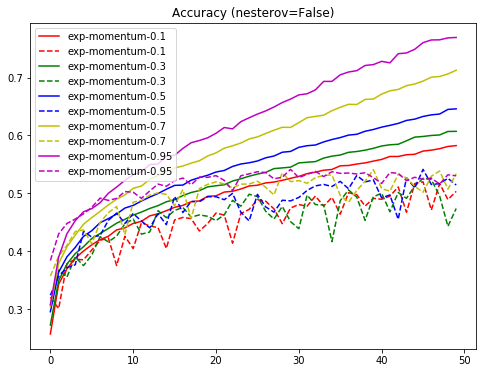

In [11]:
# plotting the result after training 50 epoch in different values of momentum and nesterov=False
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss (nesterov=False)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy (nesterov=False)")
plt.legend()
plt.show()

dict_keys(['exp-momentum-0.1', 'exp-momentum-0.3', 'exp-momentum-0.5', 'exp-momentum-0.7', 'exp-momentum-0.95'])
